In [1]:
from PIL import Image
import numpy as np

In [2]:
import lzma
import pickle
with lzma.open("mnist.pkl.xz", 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')

In [3]:
train_X, train_y = train_set
validation_X, validation_y = validation_set
test_X, test_y = test_set

In [4]:
train_X.shape

(50000, 784)

In [5]:
train_y.shape

(50000,)

In [6]:
import scipy.stats
scipy.stats.describe(train_X[0])

DescribeResult(nobs=784, minmax=(0.0, 0.99609375), mean=0.13714226, variance=0.096924409, skewness=2.057842493057251, kurtosis=2.5339472207134843)

In [7]:
from IPython.display import display
def showX(X):
    int_X = (X*255).clip(0,255).astype('uint8')
    # N*784 -> N*28*28 -> 28*N*28 -> 28 * 28N
    int_X_reshape = int_X.reshape(-1,28,28).swapaxes(0,1).reshape(28,-1)
    display(Image.fromarray(int_X_reshape))
# 訓練資料， X 的前 20 筆
showX(train_X[:20])
print(train_y)

[5 0 4 ..., 8 4 8]


In [8]:
import tensorflow as tf
from tfdot import tfdot

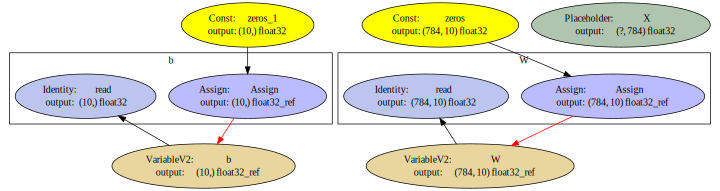

In [9]:
# 輸入的 placeholder
X = tf.placeholder(tf.float32, shape=[None, 784], name="X")
# 權重參數，為了計算方便和一些慣例（行向量及列向量的差異），矩陣乘法的方向和上面解說相反
W = tf.Variable(tf.zeros([784, 10]), name='W')
b = tf.Variable(tf.zeros([10]), name='b') # 這裡可以看成是列向量

tfdot()

### one hot

In [10]:
np.eye(10)[train_y][:10]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

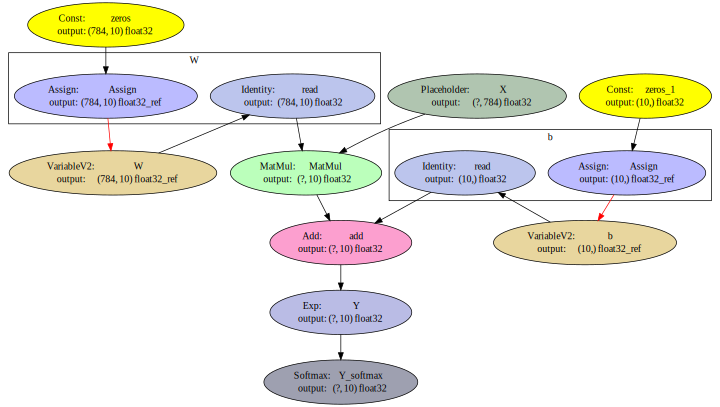

In [11]:
# 計算出來的公式
Y = tf.exp(tf.matmul(X, W) +b, name="Y")
Y_softmax = tf.nn.softmax(Y, name="Y_softmax")
# or 
#Y_softmax = tf.div(Y, tf.reduce_sum(Y, axis=1, keep_dims=True), name="Y_softmax")
tfdot()

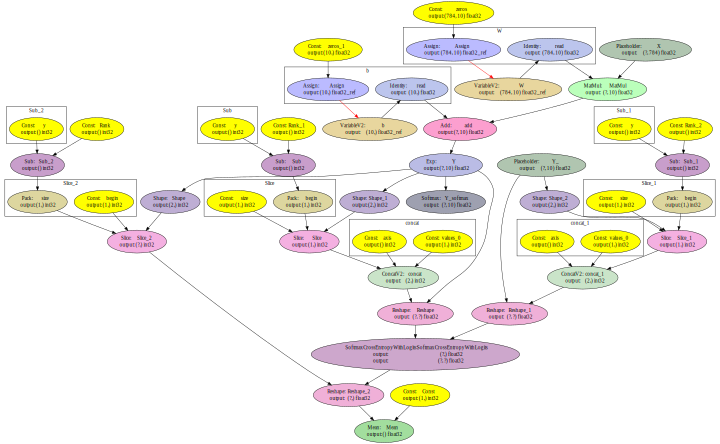

In [12]:
# 真正的 Y
Y_ = tf.placeholder(tf.float32, shape=[None, 10], name="Y_")
#和算出來的 Y 來做 cross entropy
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y_*tf.log(Y_softmax), axis=1))
# or
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y_, logits=Y))
tfdot()

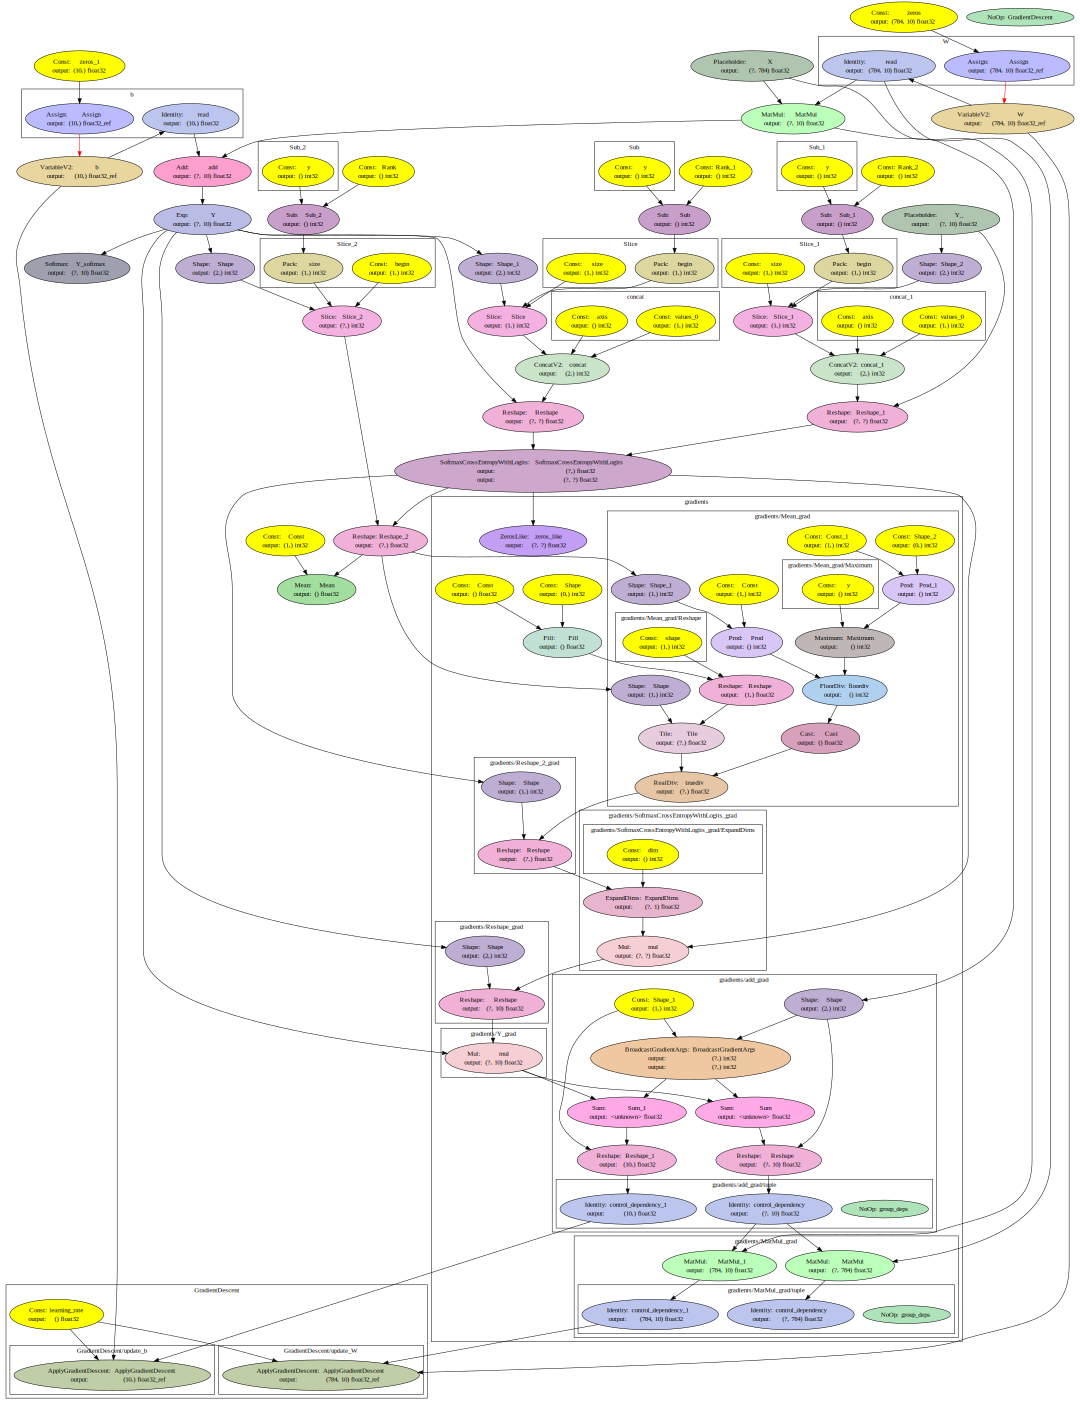

In [13]:
#0.01為學習率, trial and error
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
tfdot(size=(15,30))

In [14]:
#one hot 
train_Y = np.eye(10)[train_y]
test_Y = np.eye(10)[test_y]
validation_Y = np.eye(10)[validation_y]

In [15]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [16]:
for i in range(1000):
    rnd_idx = np.random.choice(train_X.shape[0], 50, replace=False) #隨機選50筆訓練
    train_step.run(feed_dict={X: train_X[rnd_idx], Y_:train_Y[rnd_idx]})

In [31]:
train_Y

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [17]:
Y.eval(feed_dict={X: train_X[:10]})

array([[  2.55510473,   0.77105975,   2.20598125,   5.91662025,
          0.74260491,   6.86315012,   2.33719301,   2.49417329,
          2.48012352,   2.3104248 ],
       [ 17.04512215,   0.24277358,   1.69047427,   1.77323925,
          0.5283249 ,   3.37504601,   1.68230903,   1.86517978,
          1.99512362,   1.20020521],
       [  1.10377181,   0.58633757,   1.60403597,   1.8192457 ,
          3.9253695 ,   0.73649114,   1.3139497 ,   1.46972108,
          1.35843694,   1.88414466],
       [  0.969868  ,   8.94590759,   4.34342718,   2.17495775,
          1.55092335,   1.23813224,   1.34109211,   1.50022304,
          4.01678419,   1.47748375],
       [  0.98594773,   1.71913052,   1.33503366,   1.71468532,
          8.67541885,   2.27962947,   1.86715579,   7.57173252,
          4.80763721,  14.15104675],
       [  1.72022498,   0.52629781,   7.91790819,   2.30981994,
          1.51937807,   1.73293066,   1.45405233,   2.49807262,
          3.24774885,   5.30023289],
       [  

In [18]:
Y_softmax.eval(feed_dict={X: train_X[:10]})

array([[  9.20638256e-03,   1.54627964e-03,   6.49331696e-03,
          2.65446305e-01,   1.50290073e-03,   6.83989406e-01,
          7.40374066e-03,   8.66217446e-03,   8.54132231e-03,
          7.20818480e-03],
       [  9.99997258e-01,   5.04465341e-08,   2.14565588e-07,
          2.33079618e-07,   6.71188616e-08,   1.15653847e-06,
          2.12820723e-07,   2.55525180e-07,   2.90982996e-07,
          1.31413103e-07],
       [  3.45605277e-02,   2.05997266e-02,   5.69957346e-02,
          7.06816390e-02,   5.80743849e-01,   2.39371471e-02,
          4.26441506e-02,   4.98322025e-02,   4.45840918e-02,
          7.54209310e-02],
       [  3.36376746e-04,   9.78984654e-01,   9.81621444e-03,
          1.12250866e-03,   6.01416046e-04,   4.39877418e-04,
          4.87580692e-04,   5.71684272e-04,   7.08083995e-03,
          5.58831147e-04],
       [  1.90549042e-06,   3.96665155e-06,   2.70154874e-06,
          3.94905919e-06,   4.16391389e-03,   6.94777555e-06,
          4.59950161e-06

In [19]:
prediction = tf.argmax(Y, axis=1)

# print predictions
prediction.eval(feed_dict={X: train_X[:10]})

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [20]:
# print labels
showX(train_X[:10])
train_y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [21]:
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_, 1))

correct_prediction.eval({X: train_X[:10] , Y_: train_Y[:10]})

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [22]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

accuracy.eval(feed_dict={X: train_X[:10] , Y_: train_Y[:10]})

1.0

In [23]:
accuracy.eval(feed_dict={X: train_X , Y_: train_Y})

0.90722001

In [24]:
accuracy.eval({X: test_X , Y_: test_Y})

0.91049999

In [25]:
#sess.close()